In [2]:
import breeze_connect
from breeze_connect import BreezeConnect

`Generate session token for each day`  
Log into the [icici direct using API key](https://api.icicidirect.com/apiuser/login?api_key=06890j43os6a521A7b7241i934KQ9S56) while the 'developer tools -> network' tab is open  
`Copy 'API_session' key for 'payload' section in 127.0.0.1`    

In [3]:
fresh_token = 2294584

In [4]:
isec = BreezeConnect(api_key="06890j43os6a521A7b7241i934KQ9S56")
isec.generate_session(
    api_secret="$42367K2z98758S712349896J6i^64Mx",
    session_token=fresh_token)

## Historical data  

In [5]:
import datetime
period = 365
current_date = str(datetime.datetime.today())
previous_date = str(datetime.datetime.today() - datetime.timedelta(days=period))
current_date, previous_date

('2022-12-25 23:20:00.170261', '2021-12-25 23:20:00.170315')

`Daily data nifty`  

In [6]:
nifty_daily = isec.get_historical_data(
    interval="1day", 
    from_date=previous_date, 
    to_date=current_date,
    stock_code="NIFTY",
    exchange_code="NSE",
    product_type="",
    expiry_date="")

nifty_daily

{'Success': [{'datetime': '2021-12-27 12:12:00',
   'stock_code': 'NIFTY',
   'exchange_code': 'NSE',
   'product_type': None,
   'expiry_date': None,
   'right': None,
   'strike_price': None,
   'open': '16937.75',
   'high': '17112.05',
   'low': '16833.2',
   'close': '17086.25',
   'volume': '235392633',
   'open_interest': None,
   'count': 0},
  {'datetime': '2021-12-28 12:12:00',
   'stock_code': 'NIFTY',
   'exchange_code': 'NSE',
   'product_type': None,
   'expiry_date': None,
   'right': None,
   'strike_price': None,
   'open': '17177.6',
   'high': '17250.25',
   'low': '17161.15',
   'close': '17233.25',
   'volume': '240369111',
   'open_interest': None,
   'count': 1},
  {'datetime': '2021-12-29 12:12:00',
   'stock_code': 'NIFTY',
   'exchange_code': 'NSE',
   'product_type': None,
   'expiry_date': None,
   'right': None,
   'strike_price': None,
   'open': '17220.1',
   'high': '17285.95',
   'low': '17176.65',
   'close': '17213.6',
   'volume': '294896899',
   'op

In [7]:
import pandas as pd
df = pd.DataFrame(nifty_daily['Success'])
print(len(df))
df.tail()

248


,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count
243,2022-12-19 12:12:00,NIFTY,NSE,None,None,None,None,18288.1,18431.65,18244.55,18420.45,382735977,None,243
244,2022-12-20 12:12:00,NIFTY,NSE,None,None,None,None,18340.3,18404.9,18202.65,18385.3,368485441,None,244
245,2022-12-21 12:12:00,NIFTY,NSE,None,None,None,None,18435.15,18473.35,18162.75,18199.1,471434877,None,245
246,2022-12-22 12:12:00,NIFTY,NSE,None,None,None,None,18288.8,18318.75,18068.6,18127.35,406970495,None,246
247,2022-12-23 12:12:00,NIFTY,NSE,None,None,None,None,17977.65,18050.45,17779.5,17806.8,406794867,None,247


In [8]:
# df.to_csv('datasets/nifty_daily.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   datetime       248 non-null    object
 1   stock_code     248 non-null    object
 2   exchange_code  248 non-null    object
 3   product_type   0 non-null      object
 4   expiry_date    0 non-null      object
 5   right          0 non-null      object
 6   strike_price   0 non-null      object
 7   open           248 non-null    object
 8   high           248 non-null    object
 9   low            248 non-null    object
 10  close          248 non-null    object
 11  volume         248 non-null    object
 12  open_interest  0 non-null      object
 13  count          248 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 27.2+ KB


In [10]:
df.columns

Index(['datetime', 'stock_code', 'exchange_code', 'product_type',
       'expiry_date', 'right', 'strike_price', 'open', 'high', 'low', 'close',
       'volume', 'open_interest', 'count'],
      dtype='object')

In [11]:
df[['open', 'high', 'low', 'close',
       'volume']] = df[['open', 'high', 'low', 'close',
       'volume']].astype('float64')
df[['count']] = df[['count']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       248 non-null    object 
 1   stock_code     248 non-null    object 
 2   exchange_code  248 non-null    object 
 3   product_type   0 non-null      object 
 4   expiry_date    0 non-null      object 
 5   right          0 non-null      object 
 6   strike_price   0 non-null      object 
 7   open           248 non-null    float64
 8   high           248 non-null    float64
 9   low            248 non-null    float64
 10  close          248 non-null    float64
 11  volume         248 non-null    float64
 12  open_interest  0 non-null      object 
 13  count          248 non-null    int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 27.2+ KB


In [12]:
df['return'] = df['close'].pct_change()
df.tail()

,datetime,stock_code,exchange_code,product_type,expiry_date,right,strike_price,open,high,low,close,volume,open_interest,count,return
243,2022-12-19 12:12:00,NIFTY,NSE,None,None,None,None,18288.10,18431.65,18244.55,18420.45,382735977.0,None,243,0.008290
244,2022-12-20 12:12:00,NIFTY,NSE,None,None,None,None,18340.30,18404.90,18202.65,18385.30,368485441.0,None,244,-0.001908
245,2022-12-21 12:12:00,NIFTY,NSE,None,None,None,None,18435.15,18473.35,18162.75,18199.10,471434877.0,None,245,-0.010128
246,2022-12-22 12:12:00,NIFTY,NSE,None,None,None,None,18288.80,18318.75,18068.60,18127.35,406970495.0,None,246,-0.003943
247,2022-12-23 12:12:00,NIFTY,NSE,None,None,None,None,17977.65,18050.45,17779.50,17806.80,406794867.0,None,247,-0.017683


In [13]:
df['return'].describe()

count    247.000000
mean       0.000227
std        0.010926
min       -0.047781
25%       -0.005883
50%       -0.000112
75%        0.007452
max        0.030259
Name: return, dtype: float64

In [14]:
df.shape

(248, 15)

<AxesSubplot:xlabel='return', ylabel='Count'>

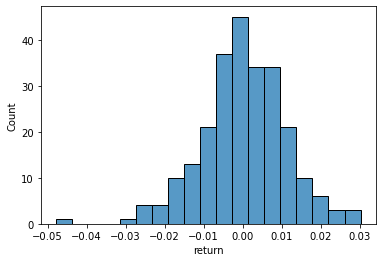

In [15]:
import seaborn as sns
sns.histplot(df['return'])

## Volatility comparison

In [16]:
period, current_date, previous_date

(365, '2022-12-25 23:20:00.170261', '2021-12-25 23:20:00.170315')

In [17]:
def predicted_range(spot, hv, sd_safety):
    movt = spot * hv/100 * sd_safety
    upper = spot + movt
    lower = spot - movt
    return spot, movt, lower, upper

predicted_range(17830, 0.65, 1.5)

(17830, 173.8425, 17656.1575, 18003.8425)

In [18]:
hv_daily = df['return'].describe()["std"]*100
hv_mo = (hv_daily)*(12**0.5)
hv_daily, hv_mo

(1.0925637324578714, 3.784751790248246)

In [19]:
hv_mo = (hv_daily)*(12**0.5)
print(hv_mo)
print(predicted_range(18484, hv_mo, 1))
print(predicted_range(18484, hv_mo, 1.5))

3.784751790248246
(18484, 699.5735209094859, 17784.426479090514, 19183.573520909486)
(18484, 1049.3602813642287, 17434.63971863577, 19533.36028136423)


`Supports and resistances`  

In [20]:
df.shape

(248, 15)

In [21]:
df.columns

Index(['datetime', 'stock_code', 'exchange_code', 'product_type',
       'expiry_date', 'right', 'strike_price', 'open', 'high', 'low', 'close',
       'volume', 'open_interest', 'count', 'return'],
      dtype='object')

In [24]:
df[['datetime', 'close']]

,datetime,close
0,2021-12-27 12:12:00,17086.25
1,2021-12-28 12:12:00,17233.25
2,2021-12-29 12:12:00,17213.60
3,2021-12-30 12:12:00,17203.95
4,2021-12-31 12:12:00,17354.05
...,...,...
243,2022-12-19 12:12:00,18420.45
244,2022-12-20 12:12:00,18385.30
245,2022-12-21 12:12:00,18199.10
246,2022-12-22 12:12:00,18127.35


In [28]:
troughs = []
for i in range(1, df.shape[0]-1):
    close = df['close'][i]
    prev_close = df['close'][i-1]
    next_close = df['close'][i+1]
    if prev_close > close and next_close > close:
        troughs.append(close)
len(troughs)

49

In [35]:
troughs[-10:]

[17014.35,
 17656.35,
 18052.7,
 18028.2,
 18329.15,
 18159.95,
 18696.1,
 18560.5,
 18496.6,
 18269.0]

In [29]:
peaks = []
for i in range(1, df.shape[0]-1):
    close = df['close'][i]
    prev_close = df['close'][i-1]
    next_close = df['close'][i+1]
    if prev_close < close and next_close < close:
        peaks.append(close)
len(peaks)

50

In [36]:
peaks[-10:]

[17730.75,
 18145.4,
 18202.8,
 18349.7,
 18409.65,
 18812.5,
 18701.05,
 18609.35,
 18660.3,
 18420.45]